# Grayscale Pixel Values as Features

## Import required Libraries

In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

We want to see if we can have access to the images by showing one

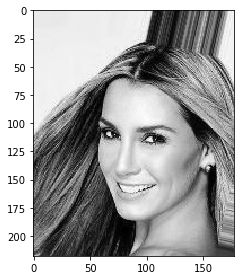

In [2]:
image = imread('./datasets/celeba/img/0.jpg', as_gray = True)
imshow(image);

Now let's see the dimensions of the image

In [3]:
image.shape,image

((218, 178),
 array([[0.91375412, 0.91375412, 0.91375412, ..., 0.90349176, 0.94214275,
         0.94214275],
        [0.91375412, 0.91375412, 0.91375412, ..., 0.91076941, 0.94214275,
         0.94214275],
        [0.91375412, 0.91375412, 0.91375412, ..., 0.92058471, 0.94606431,
         0.94606431],
        ...,
        [0.33162431, 0.23161294, 0.34982549, ..., 0.26388549, 0.26725647,
         0.26725647],
        [0.2865149 , 0.31788745, 0.42825686, ..., 0.24145725, 0.24819922,
         0.24819922],
        [0.43553451, 0.57671098, 0.73806078, ..., 0.24145725, 0.24706039,
         0.24706039]]))

## Data Separation

We define directions to acces the images

In [4]:
global basedir, image_paths, target_size
basedir = './datasets/celeba'
images_dir = os.path.join(basedir,'img')
labels_filename = 'labels2.csv'

The extract_feature_label() is a function used to extract images features and store them in an array. And also store the labels in another array.



In [5]:
def extract_features_labels():
    
    image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)] # Créer un path en incluant le nom de chaque mage ?
    target_size = None
    labels_file = open(os.path.join(basedir, labels_filename), 'r')
    lines = labels_file.readlines()
    smile_labels = {line.split(',')[0] : int(line.split(',')[3]) for line in lines[1:]}
    if os.path.isdir(images_dir): # SI le Path existe 
        all_features = []
        all_labels = []
        for img_path in image_paths: # Pour chaque image 
            file_name= img_path.split('.')[1].split('/')[-1]

            # load image
            img = imread(img_path, as_gray = True)
            features = np.reshape(img, (218*178))
            if features is not None:
                all_features.append(features)
                all_labels.append(smile_labels[file_name])

    landmark_features = np.array(all_features)
    smile_labels = (np.array(all_labels) + 1)/2 # simply converts the -1 into 0, so not smile=0 and smile=1
    return landmark_features, smile_labels

The following get_data() function splits the data in training and test sets

In [6]:
def get_data():

    X, y = extract_features_labels()
    Y = np.array([y, -(y - 1)]).T
    tr_X = X[:3500]
    tr_Y = Y[:3500]
    te_X = X[3500:]
    te_Y = Y[3500:]

    return tr_X, tr_Y, te_X, te_Y

We run the get_data() function

In [7]:
tr_X, tr_Y, te_X, te_Y= get_data()

In [8]:
tr_X.shape

(3500, 38804)

In [9]:
te_X.shape

(1500, 38804)

In [10]:
tr_Y.shape

(3500, 2)

## Linear SVC

Import Corresponding Libraries

In [11]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm

We then use the following function to classify the data and to print the accuracy

In [12]:
def img_SVM(training_images, training_labels, test_images, test_labels):
    classifier = svm.SVC(kernel = 'linear')
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    print("Accuracy:", accuracy_score(test_labels, pred))

    print(pred)
    return pred

#pred=img_SVM(tr_X.reshape((100, 68*2)), list(zip(*tr_Y))[0], te_X.reshape((4700, 68*2)), list(zip(*te_Y))[0])
pred=img_SVM(tr_X, list(zip(*tr_Y))[0], te_X, list(zip(*te_Y))[0])

Accuracy: 0.8413333333333334
[1. 1. 0. ... 0. 1. 0.]


# K-Nearest Neighbours

We import corresponding Libraries

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

Extract featues again and split them 

In [14]:
X, y = extract_features_labels()

In [15]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=3)

In [16]:
print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(X)),3), round((len(y_test)*1.0)/len(X),3)))

train set: 0.7  | test set: 0.3


In [17]:
X_train.shape

(3500, 38804)

In [18]:
y_train.shape

(3500,)

In [19]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

The following function is used for the K-Neighbours Classifier

In [20]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model


    Y_pred = neigh.predict(X_test)
    return Y_pred




Y_pred =KNNClassifier(X_train, y_train, X_test,4)
  

score=metrics.accuracy_score(y_test,Y_pred)
print(score)

0.5886666666666667
